<a href="https://colab.research.google.com/github/utkarshg1/Test1/blob/main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Binary Classification with Keras
Classify loan approval
1. 0 - Rejected
2. 1 - Approved

In [1]:
url1 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_loan.csv"
print(url1)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_loan.csv


In [2]:
import pandas as pd
df = pd.read_csv(url1)
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


### Step 2 - Perform Basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [4]:
df.isna().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


In [5]:
df.duplicated().sum()

0

### Step 3 - Seperate X and Y

In [6]:
X = df.drop(columns= ["id", "loan_status"])
Y = df[["loan_status"]]

In [7]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [8]:
Y.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


In [9]:
Y.value_counts()

,count
loan_status,
0,50295
1,8350


<Axes: xlabel='loan_status'>

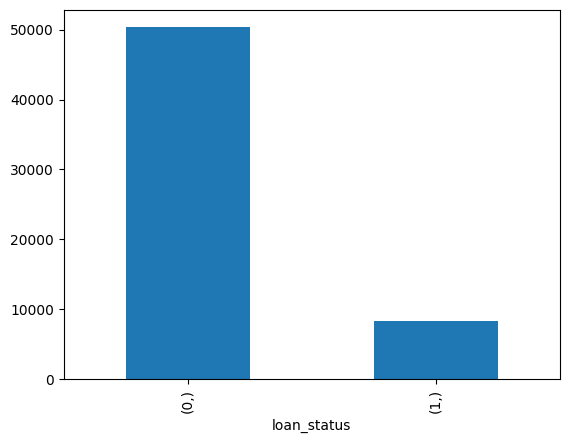

In [10]:
Y.value_counts().plot(kind="bar")

### Step 4 - Apply preprocessing on X

In [11]:
X.dtypes

,0
person_age,int64
person_income,int64
person_home_ownership,object
person_emp_length,float64
loan_intent,object
loan_grade,object
loan_amnt,int64
loan_int_rate,float64
loan_percent_income,float64
cb_person_default_on_file,object


In [12]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [13]:
cat

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [14]:
con

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [17]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

In [18]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, con),
        ("cat", cat_pipe, cat)
    ]
).set_output(transform="pandas")

In [19]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Step 5- Train Test split

In [20]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [21]:
xtrain.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
14337,1.400450,-0.370311,-1.187200,-0.362625,1.045295,-0.209808,2.279989,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17117,-0.091305,-0.549585,-0.429576,-0.758041,0.323635,-0.427932,0.790845,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
32590,-0.422806,0.156966,-1.187200,-0.218837,-0.921970,-0.536994,-0.698298,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
55811,1.897701,0.288785,-0.682117,1.039305,-1.363533,0.444564,1.287227,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40120,-0.920057,-0.486311,0.075506,-0.937775,-0.994465,-0.755118,-0.946489,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
ytrain.head()

,loan_status
14337,0
17117,0
32590,0
55811,0
40120,0


In [23]:
xtest.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
4657,-0.754307,-0.633949,-1.187200,-0.991696,-0.882427,-0.755118,-0.450108,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
56440,-0.422806,-0.106673,1.085671,-0.758041,-0.688007,-0.864180,-0.450108,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
42117,0.737448,0.059419,-1.187200,1.937978,0.610322,1.098935,0.046274,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10849,-0.920057,-0.897587,-1.187200,-0.758041,-0.028957,0.117378,-0.946489,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39395,-0.091305,-0.106673,-0.934659,-0.398572,0.504874,-0.427932,1.039036,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


In [25]:
xtrain.shape

(46916, 26)

In [26]:
xtest.shape

(11729, 26)

In [27]:
xtrain.shape[1]

26

### Step 6- Build the neural network

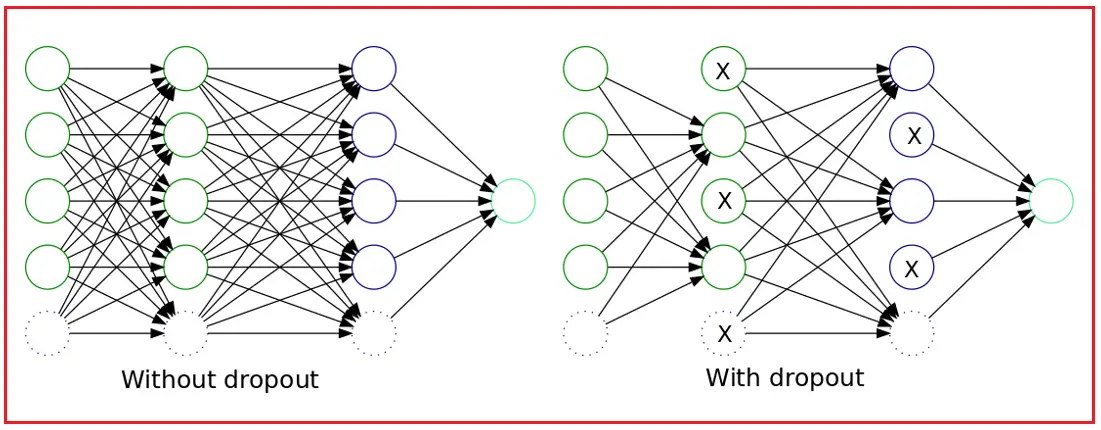

In [28]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout

In [29]:
# Intialize neural network
model = Sequential()

# Add Input layer
model.add(Input( shape=(xtrain.shape[1],) ))

# Add Dense Layer 1
model.add(Dense(units=32, activation="relu"))
# Add Dropout layer 1
model.add(Dropout(rate=0.3))

# Add Dense Layer 2
model.add(Dense(units=16, activation="relu"))
# Add Dropout layer 2
model.add(Dropout(rate=0.2))

# Add output layer with sigmoid activation
model.add(Dense(units=1, activation="sigmoid"))

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,409 (5.50 KB)

 Trainable params: 1,409 (5.50 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [32]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=60)

Epoch 1/60
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8640 - loss: 0.3438 - val_accuracy: 0.9192 - val_loss: 0.2295
Epoch 2/60
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9186 - loss: 0.2327 - val_accuracy: 0.9306 - val_loss: 0.2133
Epoch 3/60
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9256 - loss: 0.2206 - val_accuracy: 0.9354 - val_loss: 0.2046
Epoch 4/60
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9314 - loss: 0.2132 - val_accuracy: 0.9393 - val_loss: 0.1968
Epoch 5/60
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9359 - loss: 0.2020 - val_accuracy: 0.9401 - val_loss: 0.1937
Epoch 6/60
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9355 - loss: 0.2008 - val_accuracy: 0.9408 - val_loss: 0.1916
Epoch 7/60
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9391 - loss: 0.1955 - val_accuracy: 0.9416 - val_loss: 0.1899
Epoch 8/60
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9398 - loss: 0.1940 - 

### Plot the learning curve

In [33]:
import matplotlib.pyplot as plt

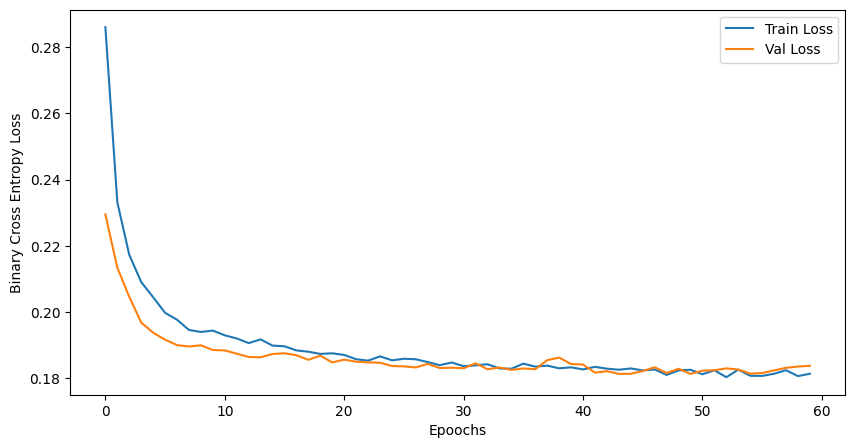

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Val Loss")
plt.xlabel("Epoochs")
plt.ylabel("Binary Cross Entropy Loss")
plt.legend()
plt.show()

### Step 7 - Model evaluation

In [35]:
model.evaluate(xtrain, ytrain)

1467/1467 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9498 - loss: 0.1702


[0.1716904491186142, 0.9492284059524536]

In [36]:
model.evaluate(xtest, ytest)

367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9513 - loss: 0.1692


[0.17398959398269653, 0.9503794312477112]